<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b>HSC Cosmos Analysis Notebook</b> <br>
Contact author: Ian Sullivan<br>
Last verified to run: May 17, 2023<br>
LSST Science Piplines version: d_2023_05_17<br>
Container Size: Large <br>

# DM-38741: Investigate best setting of maxFootprintArea in DipoleFitTask

## Current Run details

New baseline run.

* Templates are in `u/mrawls/DM-34711/templates`
* Final processing of HSC COSMOS is in  `u/elhoward/DM-38590/HSC`
* Postgres schema is `elhoward_dm38590_hsc_appipe`
* Working directory on USDF with bps logs, pipelines, etc. is `/sdf/group/rubin/user/elhoward/repo-main-logs/DM-38590`

For ApPipeWithFakes.yaml:
```
inCollection: u/mrawls/DM-34711/templates,HSC/raw/RC2/9813,HSC/calib,HSC/masks,refcats,skymaps
dataQuery: "instrument='HSC' AND skymap='hsc_rings_v1' AND band IN ('g', 'r', 'i', 'z', 'y')"
```


## Table of Contents

1. [Loading DiaObjects and DiaSources](#section_1)
2. [DiaObject and DiaSources analysis](#section_2)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd
import astropy.units as u
import lsst.afw.display as afwDisplay
import lsst.geom

import lsst.daf.butler as dafButler
from lsst.analysis.ap import legacyApdbUtils as utils
from lsst.analysis.ap import legacyPlotUtils as plac

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

importlib.reload(utils)

<module 'lsst.analysis.ap.legacyApdbUtils' from '/home/s/sullii/project/build/analysis_ap/python/lsst/analysis/ap/legacyApdbUtils.py'>

## 1. <a id="section_1">Loading DiaObjects and DiaSources</a>

In [2]:
repo = '/repo/main'
butler = dafButler.Butler(repo)
instrument = 'HSC'
skymap = 'hsc_rings_v1'

dbType='postgres'
dbName='lsst-devl'

fakeStatus = 'with fakes'

dmnum = '38590'
collections = f'u/elhoward/DM-{dmnum}/HSC'
schema = f'elhoward_dm{dmnum}_hsc_appipe'
month = 'February'
year = '2023'

collectionsList = collections

In [3]:
objTable, srcTable, goodObj, goodSrc = utils.loadTables(repo,
                                                        dbName=dbName,
                                                        dbType=dbType,
                                                        instrument=instrument,
                                                        schema=schema)

In [4]:
flagTable, srcTableFlags, flagFilter, goodSrc, goodObj = utils.makeSrcTableFlags(srcTable, objTable,
                                                                                 instrument=instrument,
                                                                                 repo=repo)

## 2. <a id="section_2">DIA object and source visual analysis</a>

Plots look reasonable and are consistent with previous base run.

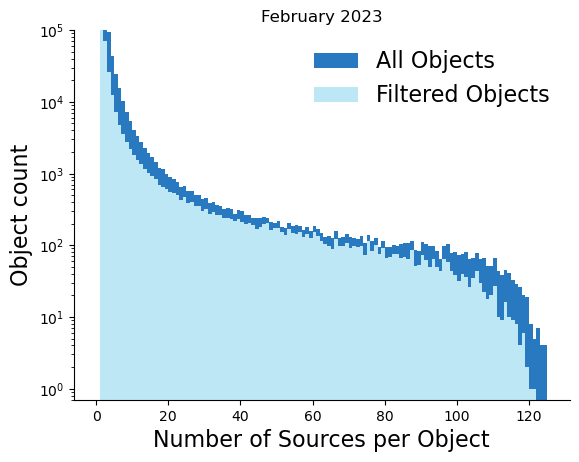

In [5]:
plac.plotDiaObjectHistogram(objTable, goodObj, title=f'{month} {year}');

In [6]:
ccdVisits = np.unique(np.sort(srcTable["ccdVisitId"]))

In [13]:
visits = np.unique(np.sort(srcTable["visit"]))

In [14]:
ccds = np.unique(np.sort(srcTable["detector"]))

In [12]:
srcTable

,diaSourceId,diaObjectId,ra,decl,ccdVisitId,midPointTai,apFlux,psFlux,apFluxErr,psFluxErr,...,x,y,ixxPSF,iyyPSF,ixyPSF,flags,filterName,visit,detector,instrument
0,502519763567035,502519763567035,150.608767,1.598474,234004,56744.273182,-1048.737797,-988.171353,346.572216,174.432111,...,43.097820,15.025450,0.164697,-0.021272,-0.021272,14288172,z,1170,4,HSC
1,502519763567036,502519763567036,150.611589,1.680900,234004,56744.273182,-4075.902281,-8584.637836,359.610437,186.911290,...,1929.171509,22.754538,0.169914,-0.021946,-0.021946,41943112,z,1170,4,HSC
2,502519763567037,502519763567037,150.611058,1.644968,234004,56744.273182,-731.686314,-1334.915736,360.002748,191.554643,...,1111.803711,33.090210,0.167665,-0.021656,-0.021656,8389928,z,1170,4,HSC
3,502519763567038,502519763567038,150.611446,1.681001,234004,56744.273182,-1958.747185,-880.151163,360.094300,205.549293,...,1931.525778,19.517678,0.169927,-0.021948,-0.021948,8388716,z,1170,4,HSC
4,502519763567039,502519763567039,150.613724,1.627217,234004,56744.273182,1844.573304,932.238775,339.879213,168.825163,...,702.940125,105.118187,0.166383,-0.021490,-0.021490,0,z,1170,4,HSC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670060,5033040245949083,5033040245949083,150.114641,2.792279,2343692,56979.612027,NaN,-2929.855976,NaN,462.554053,...,1021.921875,4165.985840,0.095646,-0.001378,-0.001378,14386540,y,11718,92,HSC
4670061,5033040245949085,5033040245949085,150.114575,2.758798,2343692,56979.612027,NaN,-3009.498950,NaN,467.406507,...,1775.001953,4167.986816,0.096542,-0.001390,-0.001390,14386540,y,11718,92,HSC
4670062,5033040245949087,5033040245949087,150.114589,2.800907,2343692,56979.612027,NaN,-2831.011165,NaN,462.294855,...,826.950500,4166.944336,0.095397,-0.001374,-0.001374,14386540,y,11718,92,HSC
4670063,5033040245949089,5033040245949089,150.114487,2.808149,2343692,56979.612027,NaN,-2794.674212,NaN,462.317042,...,662.970459,4168.998535,0.095182,-0.001371,-0.001371,14385484,y,11718,92,HSC


In [15]:
diaSrcCat = butler.get("goodSeeingDiff_diaSrc", collections=collections, visit=visits[0], detector=ccds[0], skymap=skymap, instrument=instrument)

In [16]:
def collect_dipole_pixels(visit, ccd):
    diaSrcCat = butler.get("goodSeeingDiff_diaSrc", collections=collections, visit=visit,
                           detector=ccd, skymap=skymap, instrument=instrument)
    dipoleFlag = diaSrcCat["ip_diffim_ClassificationDipole_value"] > 0
    npos = diaSrcCat["ip_diffim_NaiveDipoleFlux_npos"]
    nneg = diaSrcCat["ip_diffim_NaiveDipoleFlux_nneg"]
    ntot = npos +  nneg
    return ntot[dipoleFlag]

In [33]:
def collect_dipole_pixels_good(visit, ccd):
    diaSrcCat = butler.get("goodSeeingDiff_diaSrc", collections=collections, visit=visit,
                           detector=ccd, skymap=skymap, instrument=instrument)
    dipoleFlag = diaSrcCat["ip_diffim_ClassificationDipole_value"] > 0
    for flag in badFlagList:
        dipoleFlag *= ~diaSrcCat[flag]
    npos = diaSrcCat["ip_diffim_NaiveDipoleFlux_npos"]
    nneg = diaSrcCat["ip_diffim_NaiveDipoleFlux_nneg"]
    ntot = npos +  nneg
    return ntot[dipoleFlag]

In [17]:
a0 = collect_dipole_pixels(visits[0],ccds[0])

In [18]:
a0

array([1753, 2137], dtype=int32)

In [26]:
npixArr = np.ndarray(0, dtype=a0.dtype)

In [28]:
badFlagList = ["base_PixelFlags_flag", "base_PixelFlags_flag_edge", "base_PixelFlags_flag_interpolated",
               "base_PixelFlags_flag_saturated", "base_PixelFlags_flag_saturatedCenter", "slot_PsfFlux_flag_edge",
               "ip_diffim_ClassificationDipole_flag", "ip_diffim_DipoleFit_flag", "sky_source"]

In [27]:
for v in visits:
    for c in ccds:
        try:
            npix = collect_dipole_pixels(v, c)
            npixArr = np.append(npixArr, npix)
        except LookupError:
            print(f"Could not find dataset with visit={v} and detector={c}")

Could not find dataset with visit=1208 and detector=97
Could not find dataset with visit=1874 and detector=3
Could not find dataset with visit=11702 and detector=0
Could not find dataset with visit=11702 and detector=1
Could not find dataset with visit=11702 and detector=2
Could not find dataset with visit=11702 and detector=3
Could not find dataset with visit=11702 and detector=4
Could not find dataset with visit=11702 and detector=5
Could not find dataset with visit=11702 and detector=6
Could not find dataset with visit=11702 and detector=7
Could not find dataset with visit=11702 and detector=8
Could not find dataset with visit=11702 and detector=10
Could not find dataset with visit=11702 and detector=11
Could not find dataset with visit=11702 and detector=12
Could not find dataset with visit=11702 and detector=13
Could not find dataset with visit=11702 and detector=14
Could not find dataset with visit=11702 and detector=15
Could not find dataset with visit=11702 and detector=16
Coul

In [29]:
len(npixArr)

401750

In [30]:
np.max(npixArr)

7770

In [31]:
np.median(npixArr)

315.0

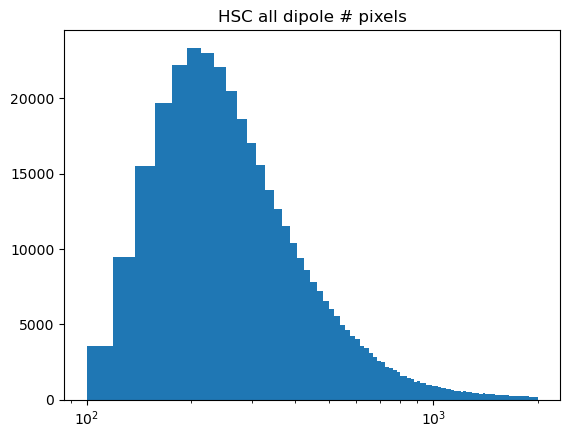

In [44]:
plt.xscale('log')
plt.title('HSC all dipole # pixels')
histplot = plt.hist(npixArr, bins=100, range=[100,2000])

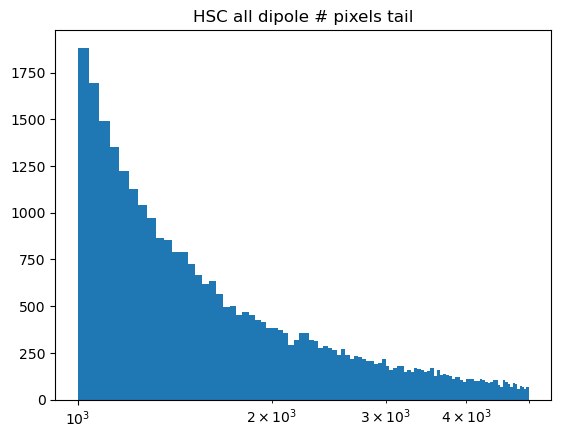

In [46]:
plt.xscale('log')
plt.title('HSC all dipole # pixels tail')
histplot = plt.hist(npixArr, bins=100, range=[1000,5000])

In [34]:
npixArr_good = np.ndarray(0, dtype=a0.dtype)

In [35]:
for v in visits:
    for c in ccds:
        try:
            npix = collect_dipole_pixels_good(v, c)
            npixArr_good = np.append(npixArr_good, npix)
        except LookupError:
            pass

In [36]:
np.max(npixArr_good)

4836

In [37]:
np.median(npixArr_good)

252.0

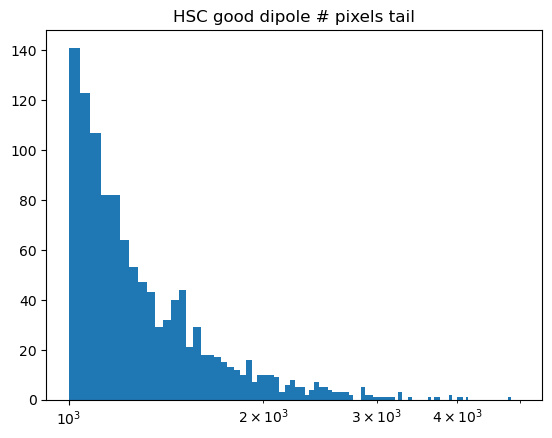

In [45]:
plt.xscale('log')
plt.title('HSC good dipole # pixels tail')
histplot = plt.hist(npixArr_good, bins=100, range=[1000,5000])

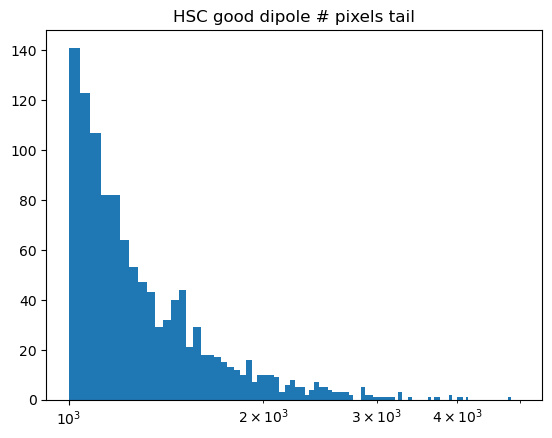

In [45]:
plt.xscale('log')
plt.title('HSC good dipole # pixels tail')
histplot = plt.hist(npixArr_good, bins=100, range=[1000,5000])

In [47]:
len(visits)

139

In [50]:
len(ccds)

103

In [51]:
1+1

2

## Find the npix cutoff
The above distribution has a clear log-linear trend with an intercept near 1000 pixels
Fit the distribution and find the intercept, assuming that the high npix tail are artifacts and not real dipoles

For all of the dipoles

In [53]:
hist_all = np.histogram(npixArr, bins=100, range=[300,1000])

n_vals = hist_all[0]

npix_vals = np.log10(hist_all[1])

fit = np.polyfit(n_vals, npix_vals[1:], 1)

x_intercept = 10**fit[1]

x_intercept

901.884285213342

For only the good dipoles

In [54]:
hist_good = np.histogram(npixArr_good, bins=100, range=[300,1000])

n_vals1 = hist_good[0]

npix_vals1 = np.log10(hist_good[1])

fit1 = np.polyfit(n_vals1, npix_vals1[1:], 1)

x_intercept1 = 10**fit1[1]

x_intercept1

792.8182164392002